In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load the training dataset
train_data = pd.read_csv("C&T train dataset.csv")

test_data = pd.read_csv("C&T test dataset.csv")

In [3]:
train_data.head(1)

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3


In [4]:
test_data.head(1)

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

- The DataFrame has 800 entries (rows) and 21 columns.
- The columns have mixed data types, including integers (int64), floating-point numbers (float64), and objects (object), which typically represent strings.
- Some columns contain missing values (non-null counts are less than 800).
- The columns represent various attributes related to credit applications, such as account information, credit history, purpose of the credit, employment status, age, and others

In [6]:
# Initialize counters for numerical and categorical columns
num_cols = 0
cat_cols = 0

# Iterate through columns and check their data types
for col in train_data.columns:
    if pd.api.types.is_numeric_dtype(train_data[col]):
        num_cols += 1
    elif pd.api.types.is_string_dtype(train_data[col]) or pd.api.types.is_categorical_dtype(train_data[col]):
        cat_cols += 1

print("Number of numerical columns:", num_cols)
print("Number of categorical columns:", cat_cols)

Number of numerical columns: 8
Number of categorical columns: 10


In [7]:
# Initialize counters for numerical and categorical columns
num_cols = 0
cat_cols = 0

# Iterate through columns and check their data types
for col in test_data.columns:
    if pd.api.types.is_numeric_dtype(test_data[col]):
        num_cols += 1
    elif pd.api.types.is_string_dtype(test_data[col]) or pd.api.types.is_categorical_dtype(test_data[col]):
        cat_cols += 1

print("Number of numerical columns:", num_cols)
print("Number of categorical columns:", cat_cols)

Number of numerical columns: 7
Number of categorical columns: 11


In [8]:
train_data.isnull().sum()

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

- employment_st: 8 missing values
- poi: 12 missing values
- gurantors: 8 missing values
- age: 4 missing values
- housing_type: 7 missing values
- The other columns (sno, acc_info, duration_month, credit_history, purpose, savings_acc, personal_status, resident_since, property_type, installment_type, credits_no, job_type, liables, telephone, foreigner, Group_no) have no missing values.

In [9]:
# Handle missing values in specific columns
train_data['poi'].fillna(train_data['poi'].mean(), inplace=True)
train_data['age'].fillna(train_data['age'].mean(), inplace=True)
train_data['employment_st'].fillna(train_data['employment_st'].mode()[0], inplace=True)
train_data['housing_type'].fillna(train_data['housing_type'].mode()[0], inplace=True)
train_data['gurantors'].fillna(train_data['gurantors'].mode()[0], inplace=True)

In [10]:
train_data.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

- Each column has a count of 0 missing values

In [11]:
test_data.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       5
poi                 5
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 2
installment_type    0
housing_type        8
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

- employment_st: 5 missing values
- poi: 5 missing values
- age: 2 missing values
- housing_type: 8 missing values
- The other columns (sno, acc_info, duration_month, credit_history, purpose, savings_acc, personal_status, gurantors, resident_since, property_type, installment_type, credits_no, job_type, liables, telephone, foreigner) have no missing values.

In [12]:
# Handle missing values in specific columns
train_data['poi'].fillna(train_data['poi'].mean(), inplace=True)
train_data['age'].fillna(train_data['age'].mean(), inplace=True)
train_data['employment_st'].fillna(train_data['employment_st'].mode()[0], inplace=True)
train_data['housing_type'].fillna(train_data['housing_type'].mode()[0], inplace=True)

In [13]:
train_data.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

- Each column has a count of 0 missing values

In [14]:
train_data.describe()

,sno,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.121566,1.106833,11.470281,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


In [15]:
pd.crosstab(train_data['Group_no'],train_data['liables'],margins=True)

liables,1,2,All
Group_no,,,
1,163,30,193
2,302,51,353
3,217,37,254
All,682,118,800


In [16]:
pd.crosstab(train_data['Group_no'],train_data['age'],margins=True)

age,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,...,63.0,64.0,65.0,66.0,67.0,68.0,70.0,74.0,75.0,All
Group_no,,,,,,,,,,,,,,,,,,,,,
1,0,1,3,1,7,11,9,11,11,9,...,3,0,0,0,0,0,1,2,1,193
2,1,7,6,14,15,14,13,15,17,12,...,3,2,2,2,1,0,0,1,0,353
3,1,4,3,8,18,8,13,15,17,10,...,1,1,1,3,2,1,0,1,1,254
All,2,12,12,23,40,33,35,41,45,31,...,7,3,3,5,3,1,1,4,2,800


In [17]:
pd.crosstab(train_data['Group_no'],train_data['credits_no'],margins=True)

credits_no,1,2,3,4,All
Group_no,,,,,
1,105,80,6,2,193
2,245,100,8,0,353
3,163,81,8,2,254
All,513,261,22,4,800


In [18]:
pd.crosstab(train_data['Group_no'],train_data['resident_since'],margins=True)

resident_since,1,2,3,4,All
Group_no,,,,,
1,18,63,26,86,193
2,53,108,52,140,353
3,36,71,44,103,254
All,107,242,122,329,800


In [19]:
pd.crosstab(train_data['Group_no'],train_data['poi'],margins=True)

poi,1.0,2.0,2.950507614213198,3.0,4.0,All
Group_no,,,,,,
1,40,63,2,35,53,193
2,51,84,7,54,157,353
3,22,37,3,31,161,254
All,113,184,12,120,371,800


In [20]:
pd.crosstab(train_data['Group_no'],train_data['duration_month'],margins=True)

duration_month,4,5,6,7,8,9,10,11,12,13,...,39,40,42,45,47,48,54,60,72,All
Group_no,,,,,,,,,,,,,,,,,,,,,
1,0,0,4,0,0,1,1,2,7,0,...,4,1,6,1,1,31,2,11,1,193
2,3,1,17,3,1,16,10,2,60,2,...,1,0,2,1,0,8,0,0,0,353
3,1,0,44,2,4,23,13,2,85,1,...,0,0,0,0,0,0,0,0,0,254
All,4,1,65,5,5,40,24,6,152,3,...,5,1,8,2,1,39,2,11,1,800


- there are 193 observations in total for Group_no 1.
- there are 353 observations in total for Group_no 2.
- there are 254 observations in total for Group_no 3.

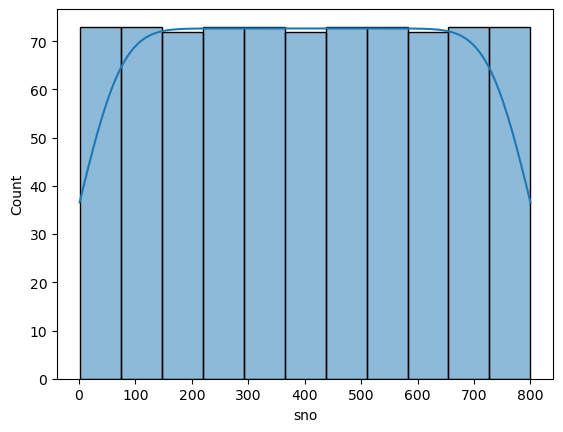

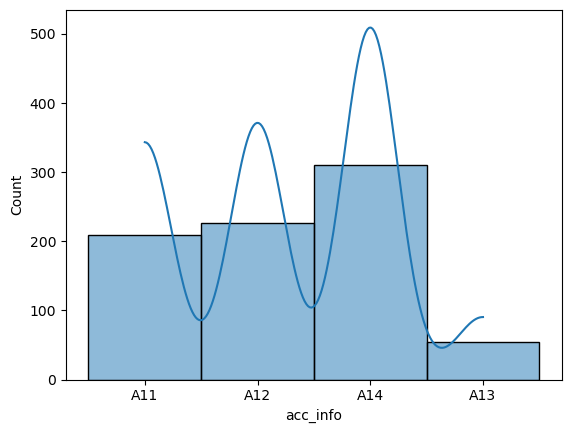

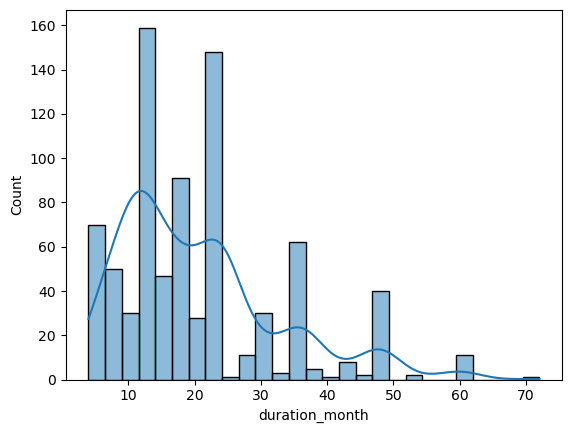

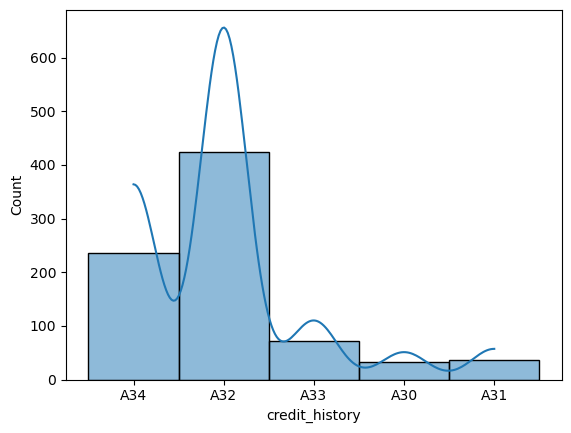

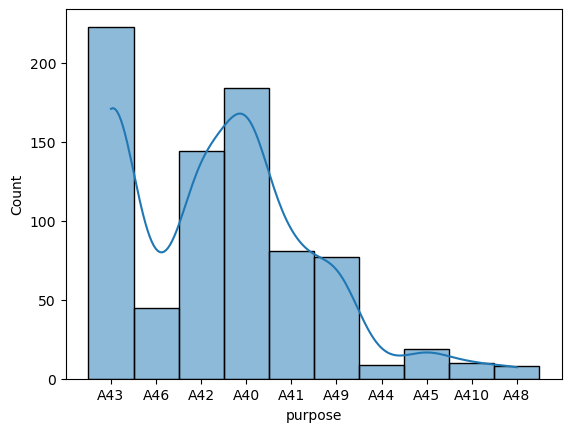

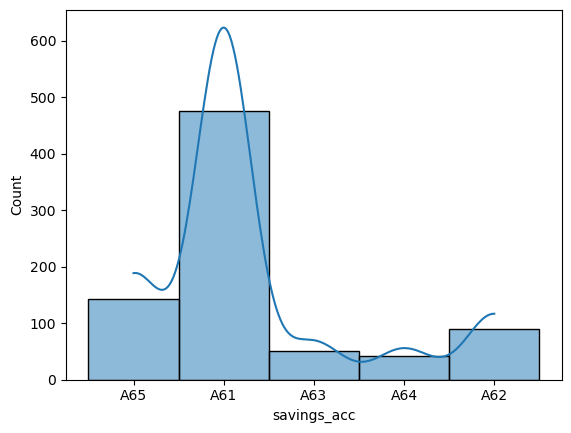

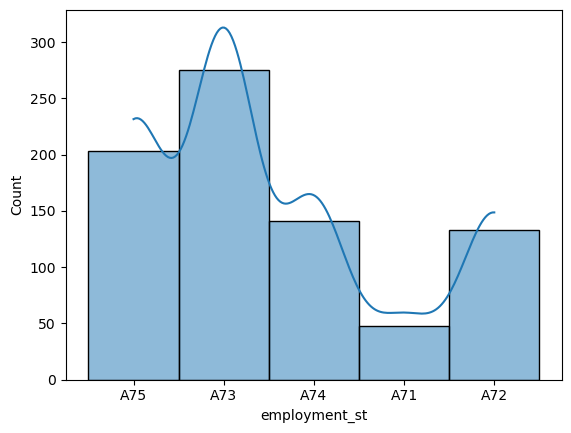

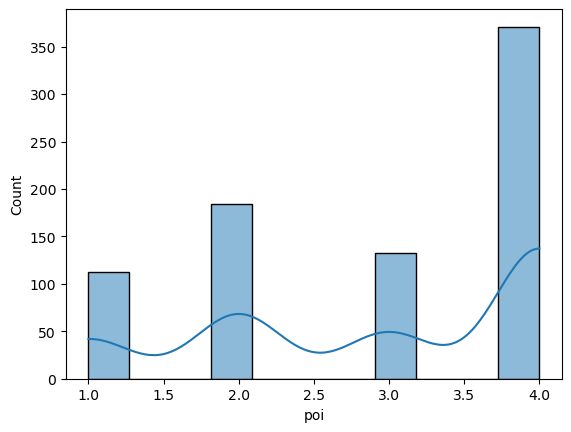

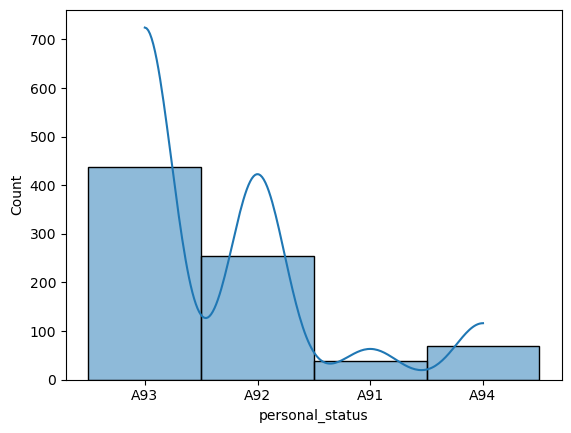

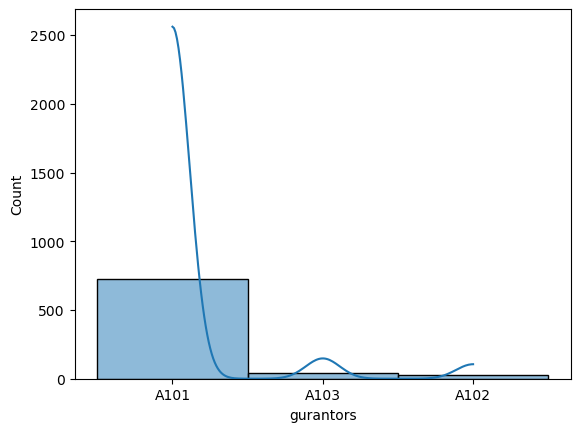

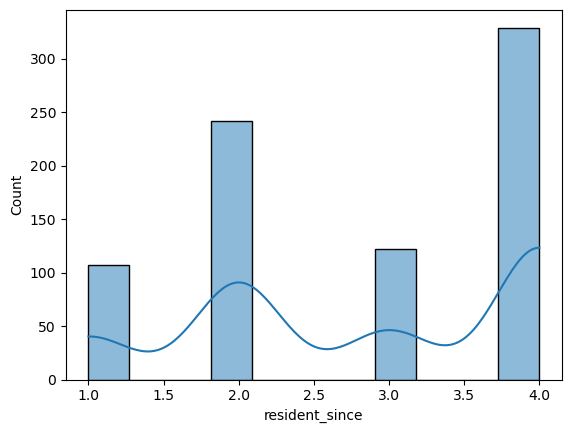

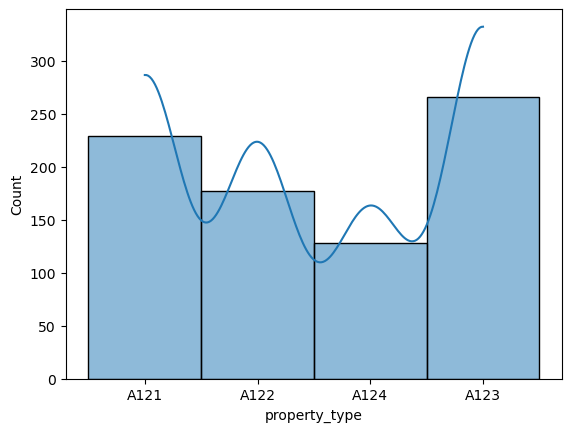

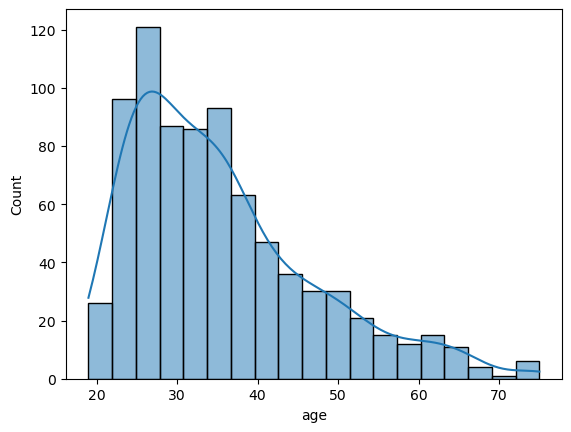

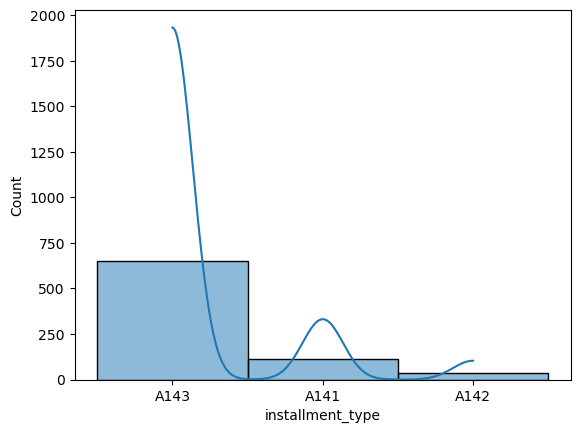

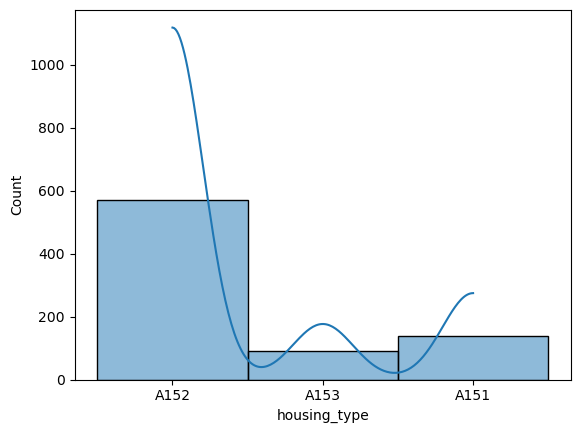

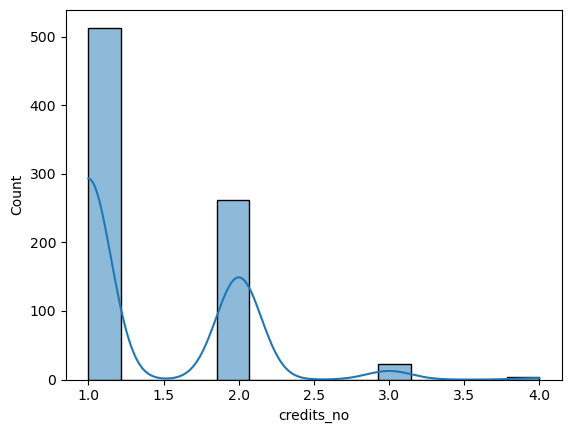

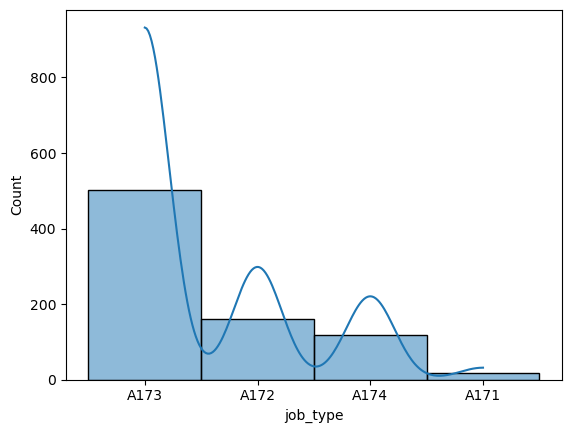

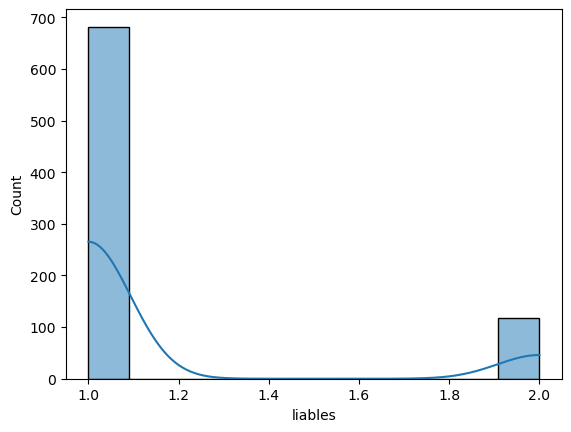

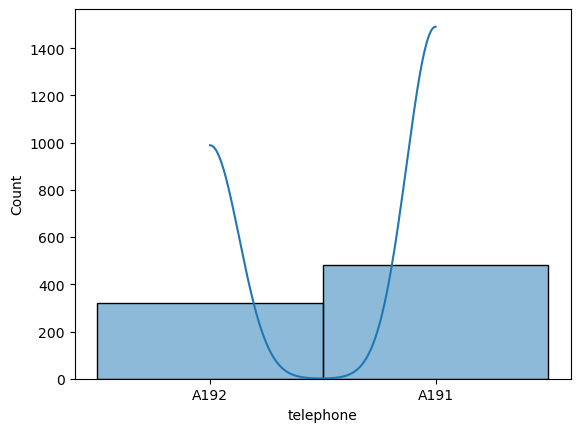

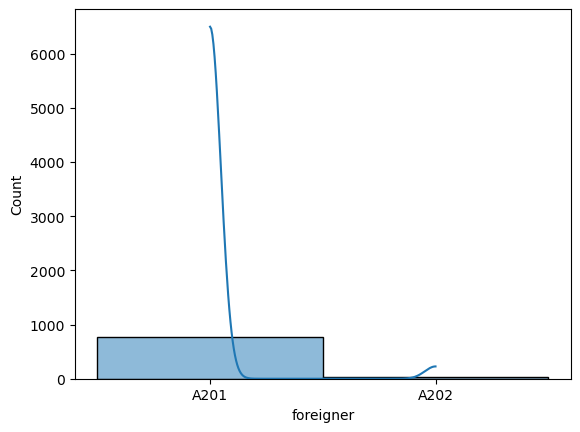

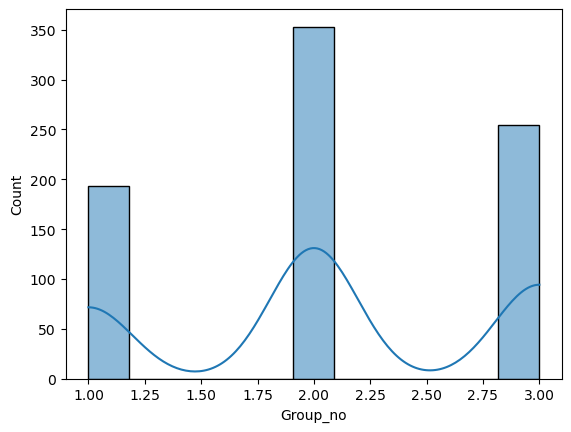

In [21]:
# Visualizing the dataset by histplot

for i in train_data:
    sns.histplot(train_data,x=i ,kde=True)
    plt.show()

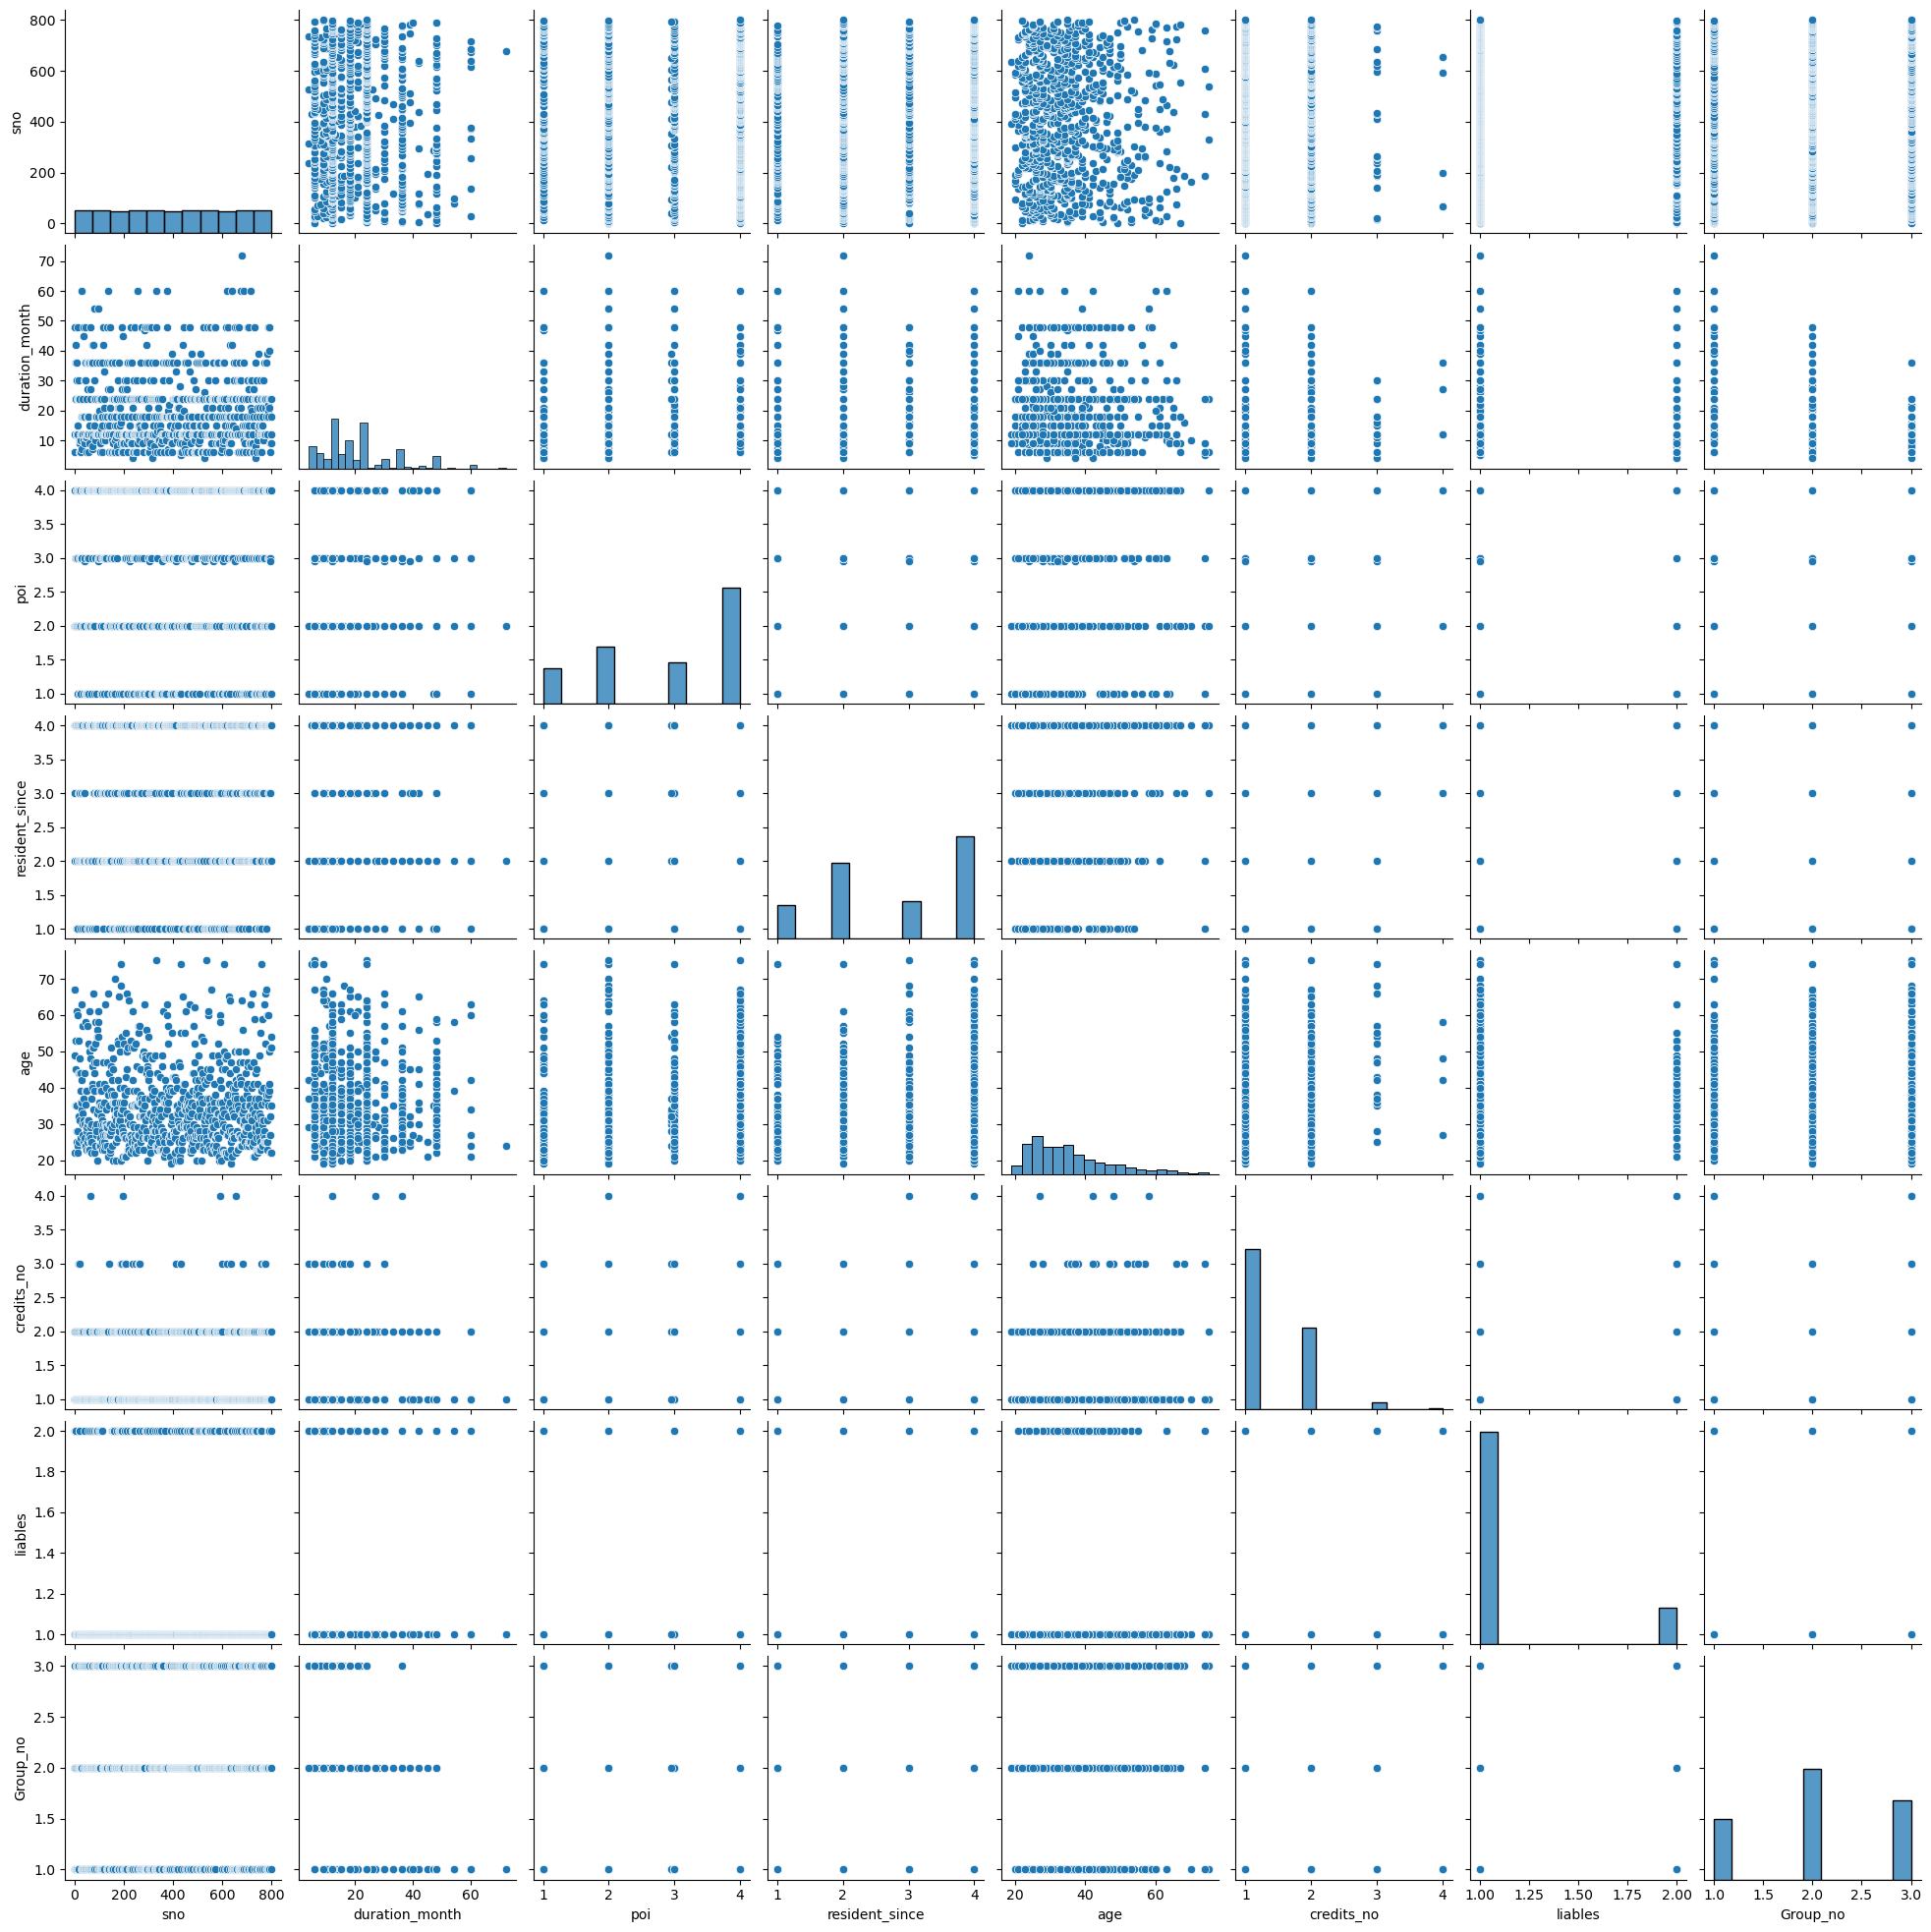

In [22]:
sns.pairplot(train_data)
plt.savefig('pairplot.png')
plt.show()

In [23]:
# Separate features and target variable for training data
X_train = train_data.drop(columns=["Group_no"])
y_train = train_data["Group_no"]

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
# Define preprocessing steps for numerical and categorical features
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [26]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)])


In [27]:
# Encode target variable for training data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [28]:
# Define models
models = {"XGBoost": XGBClassifier(),"Random Forest": RandomForestClassifier()}

In [29]:
# Separate features for testing data
X_test = test_data 

In [30]:
# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train_encoded)
    
    # Print model accuracy on training data (just for demonstration)
    accuracy = pipeline.score(X_train, y_train_encoded)
    print(f"{name} Accuracy on Training Data: {accuracy}")

    # Make predictions on test data
    y_pred = pipeline.predict(X_test)
    
    # Print predictions (just for demonstration)
    print(f"{name} Predictions: {y_pred}")


XGBoost Accuracy on Training Data: 1.0
XGBoost Predictions: [1 1 1 1 2 0 2 2 0 2 2 2 0 0 0 0 1 1 0 2 2 2 1 2 1 2 2 1 0 1 1 2 0 0 1 2 2
 2 1 1 1 0 2 1 0 1 0 2 1 2 1 0 1 1 0 1 2 1 2 1 1 1 1 1 1 1 2 0 0 2 0 2 1 2
 1 2 1 1 1 0 1 0 1 2 1 2 1 0 0 0 0 2 2 0 1 0 1 2 1 1 1 0 0 2 1 1 0 0 1 2 1
 1 1 2 1 0 1 0 0 1 1 0 2 0 1 1 1 0 1 1 1 2 1 2 2 0 2 2 1 0 0 2 1 1 2 0 1 1
 1 0 0 0 1 1 2 1 0 1 1 1 1 0 1 1 2 1 1 1 0 1 2 0 0 0 1 1 1 1 2 1 0 0 1 0 0
 2 0 1 1 0 1 2 1 1 2 2 0 2 0 0]
Random Forest Accuracy on Training Data: 1.0
Random Forest Predictions: [1 1 1 2 2 0 2 2 0 1 2 2 0 1 0 0 1 2 0 2 2 2 1 2 1 1 1 1 0 0 1 1 0 1 1 1 2
 1 1 2 0 1 2 1 1 1 1 2 1 2 2 1 1 1 0 2 2 1 1 2 1 1 1 1 1 2 1 1 0 2 0 2 1 2
 1 2 0 1 0 0 1 1 1 2 1 2 1 0 1 1 0 1 2 0 1 0 1 2 1 1 0 1 0 2 1 1 1 0 1 2 1
 1 1 2 1 0 1 0 1 1 1 0 2 1 1 1 1 0 1 2 1 2 2 2 2 0 2 1 1 0 0 2 1 1 1 0 0 1
 2 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 2 1 0 1 0 1 1 1 1 0 1 1 1 1 2 1 1 0 1 0 1
 1 0 1 1 1 1 2 1 0 1 2 0 2 0 0]


- Both models achieved perfect accuracy of 1.0 on the training data. While this high accuracy might indicate good performance

In [31]:
import pandas as pd

# Define models
models = {
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create an empty dictionary to store predictions
predictions = {}

# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on test data
    predictions[name] = pipeline.predict(X_test)

# Concatenate the sno column from the test DataFrame with the predictions
final_df = pd.DataFrame({
    'sno': test_data['sno'],  # Assuming 'sno' is the unique identifier column in the test DataFrame
    'XGBoost_Predictions': predictions["XGBoost"],
    'RandomForest_Predictions': predictions["Random Forest"]
})

# Display the final DataFrame
final_df.head(5)

,sno,XGBoost_Predictions,RandomForest_Predictions
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,2,2


In [32]:
# Save final_df to a CSV file
final_df.to_csv("f_predictions.csv", index=False)